Import library

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import joblib

Membaca dataset

In [117]:
df = pd.read_csv("TUBES.csv")

Menampilkan beberapa baris awal dataset

In [118]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


Melihat ringkasan statistik

In [119]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


Menampilkan informasi dataset

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

Menyalin dataset

In [121]:
data = df.copy()

Menghapus kolom ID Pasien

In [122]:
data.drop(columns='Patient_ID', inplace=True)

Menampilkan kembali beberapa baris awal dataset

In [123]:
data.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


Visualisasi distribusi fitur numerik

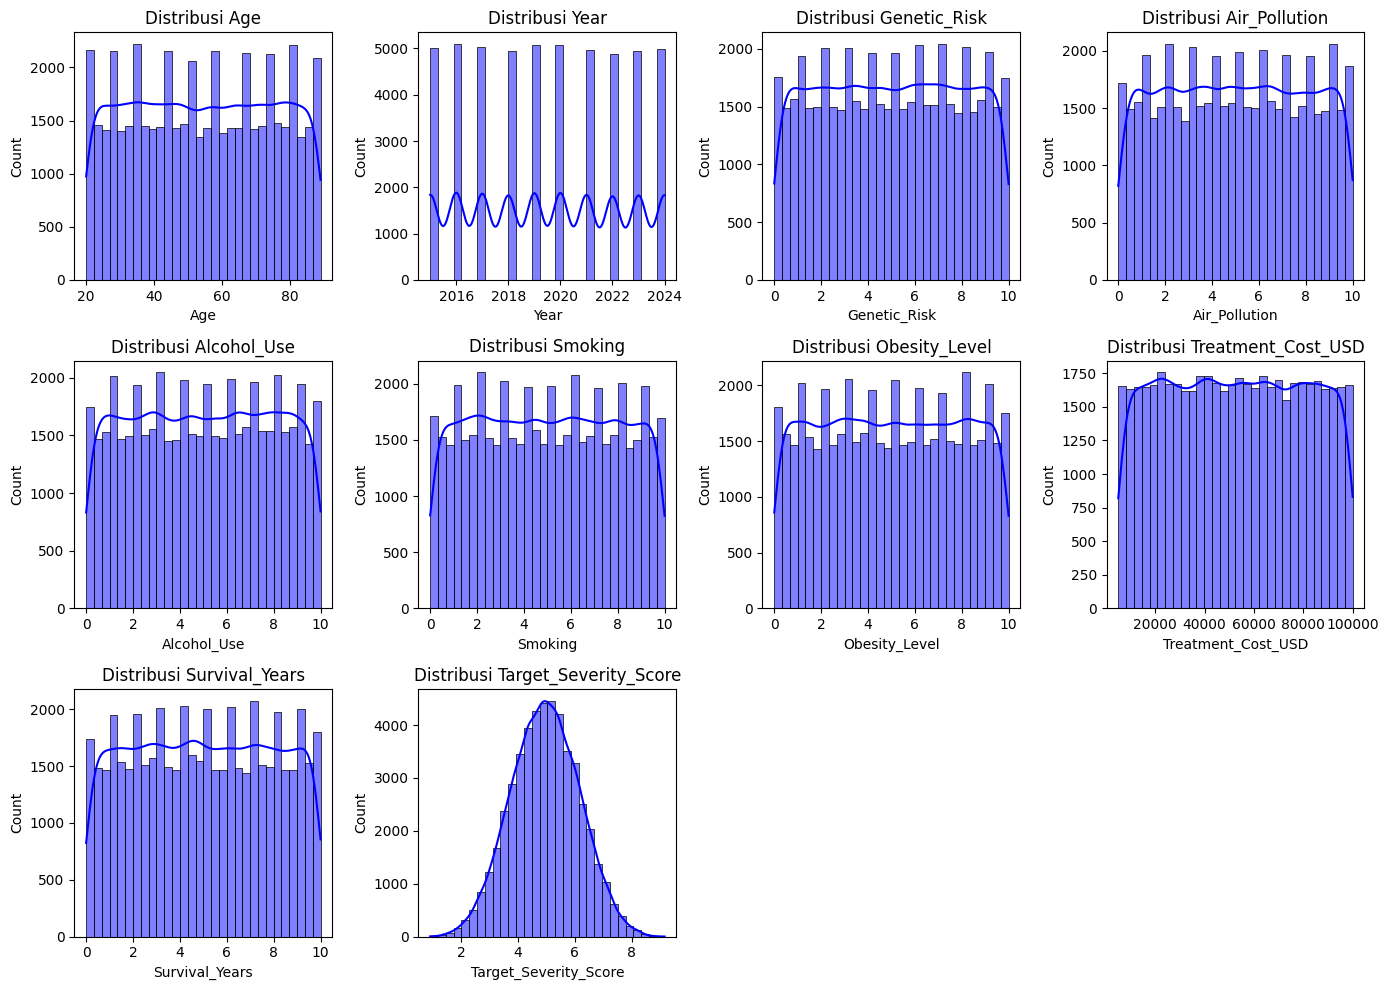

In [124]:
# Distribusi fitur numerik
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Visualisasi distribusi fitur kategorikal

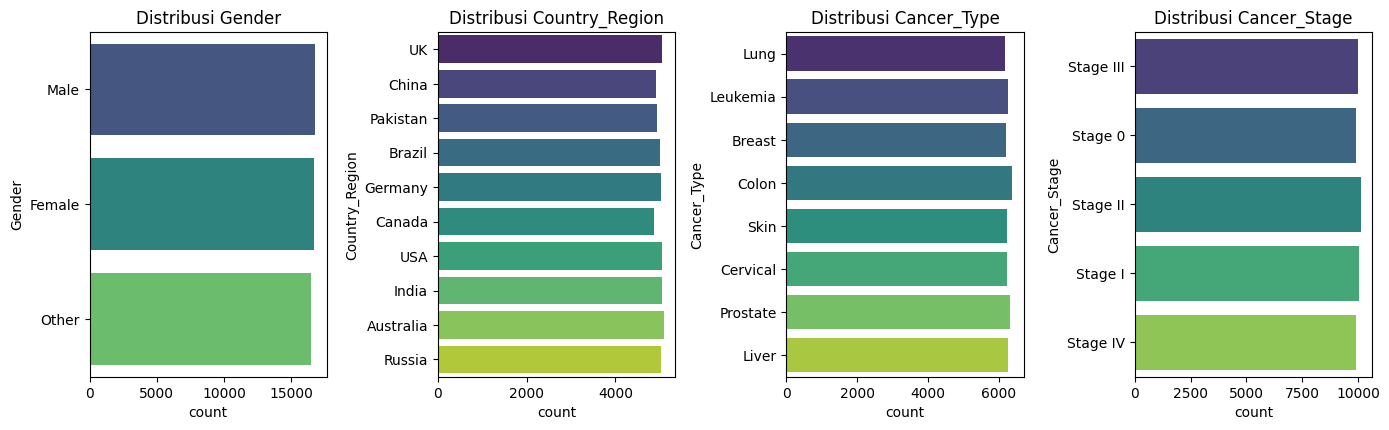

In [125]:
cat_features = data.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=data[column], hue=data[column], palette='viridis', legend=False)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()


Visualisasi korelasi fitur numerik

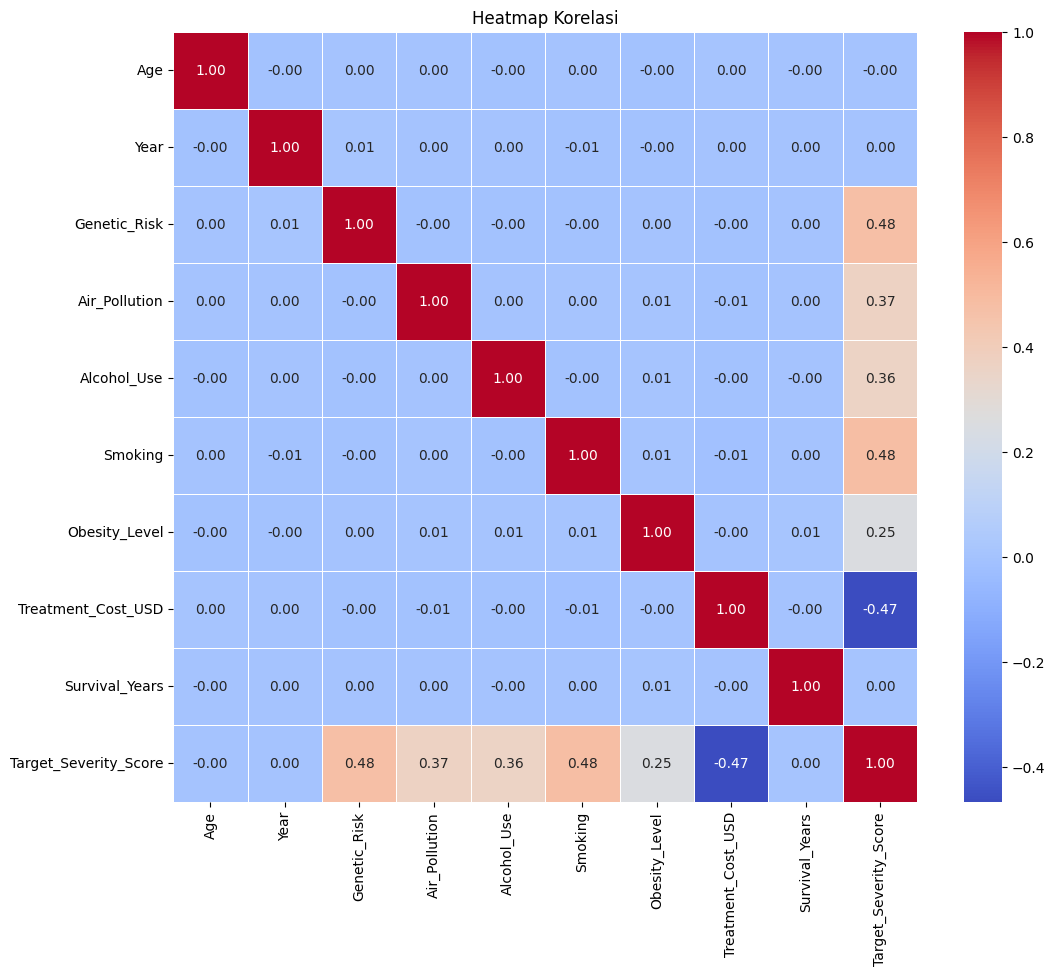

In [126]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

Mengecek data duplikat

In [127]:
# Cek data duplikasi
duplicate = data.duplicated().sum()
print(f"Jumlah data yang duplikat adalah: {duplicate}")

Jumlah data yang duplikat adalah: 0


Mengecek nilai null

In [128]:
# Cek data null
data.isnull().sum()

Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

Menghapus nilai null

In [129]:
data = data.dropna()

Mengecek kembali nilai null

In [130]:
data.isnull().sum()

Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

Visualisasi data outlier

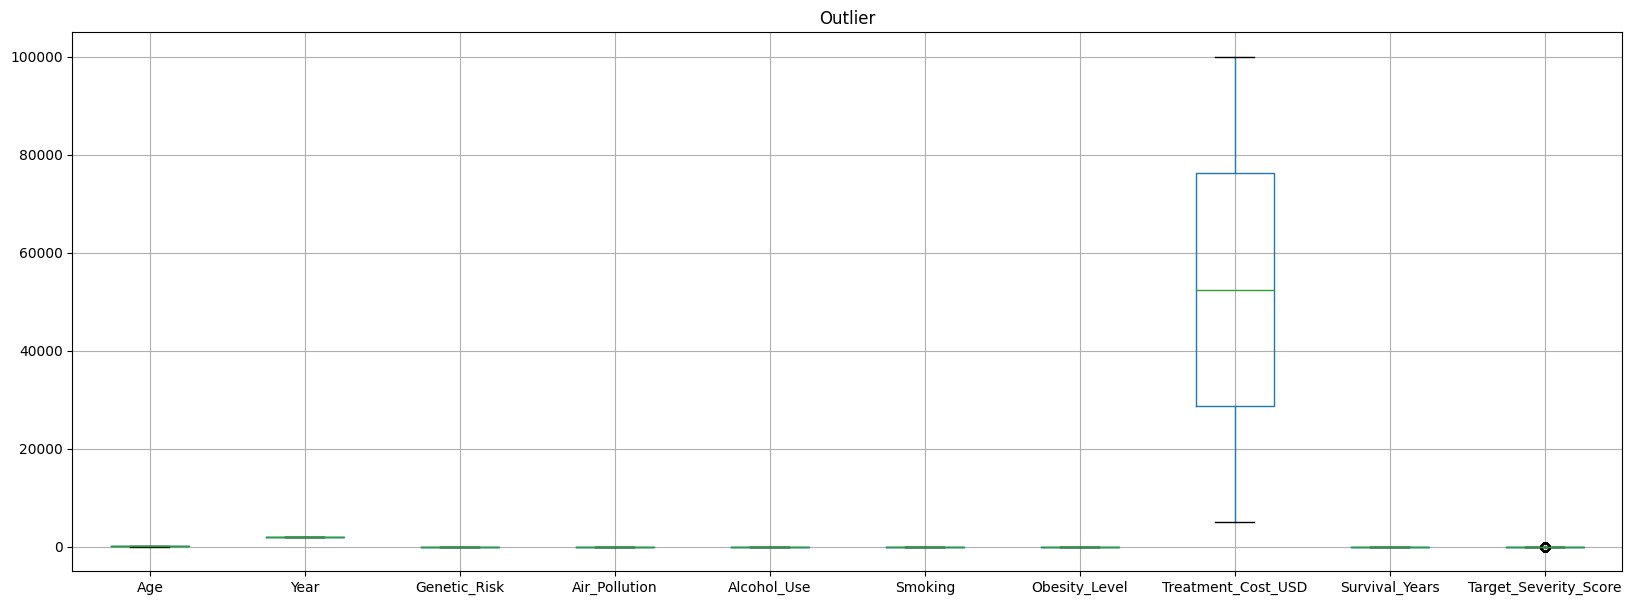

In [131]:
# Cek data outlier
data.boxplot(figsize=(20,7))
plt.title("Outlier")
plt.show()

Menghapus data outlier

In [132]:
# Hitung IQR
Q1 = data['Target_Severity_Score'].quantile(0.25)
Q3 = data['Target_Severity_Score'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data agar hanya menyisakan nilai yang tidak outlier
data_no_outliers = data[(data['Target_Severity_Score'] >= lower_bound) & (data['Target_Severity_Score'] <= upper_bound)]

# Tampilkan ukuran data sebelum dan sesudah
print("Sebelum:", data.shape)
print("Sesudah:", data_no_outliers.shape)

data = data_no_outliers

Sebelum: (50000, 14)
Sesudah: (49849, 14)


Visualisasi ulang data outlier

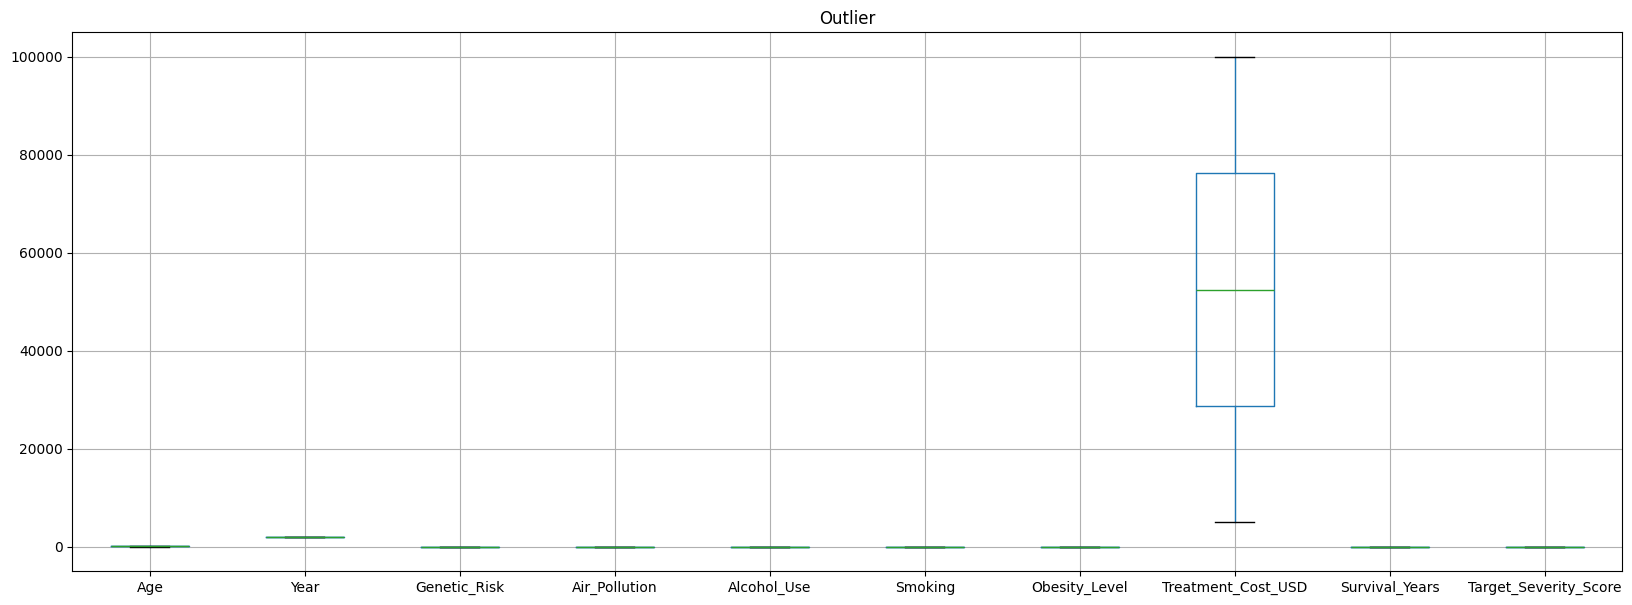

In [133]:
# Cek data outlier
data.boxplot(figsize=(20,7))
plt.title("Outlier")
plt.show()

Encoding fitur kategorikal

In [134]:
categorical_columns = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49849 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    49849 non-null  int64  
 1   Gender                 49849 non-null  int32  
 2   Country_Region         49849 non-null  int32  
 3   Year                   49849 non-null  int64  
 4   Genetic_Risk           49849 non-null  float64
 5   Air_Pollution          49849 non-null  float64
 6   Alcohol_Use            49849 non-null  float64
 7   Smoking                49849 non-null  float64
 8   Obesity_Level          49849 non-null  float64
 9   Cancer_Type            49849 non-null  int32  
 10  Cancer_Stage           49849 non-null  int32  
 11  Treatment_Cost_USD     49849 non-null  float64
 12  Survival_Years         49849 non-null  float64
 13  Target_Severity_Score  49849 non-null  float64
dtypes: float64(8), int32(4), int64(2)
memory usage: 4.9 MB


Menampilkan data setelah preprocessing

In [136]:
data.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,1,8,2021,6.4,2.8,9.5,0.9,8.7,5,3,62913.44,5.9,4.92
1,34,1,3,2021,1.3,4.5,3.7,3.9,6.3,3,0,12573.41,4.7,4.65
2,80,1,6,2023,7.4,7.9,2.4,4.7,0.1,0,2,6984.33,7.1,5.84
3,40,1,8,2015,1.7,2.9,4.8,3.5,2.7,2,1,67446.25,1.6,3.12
4,43,0,1,2017,5.1,2.8,2.3,6.7,0.5,7,3,77977.12,2.9,3.62


Mengkategorikan target

In [137]:
def severity_category(score):
    if score <= 3:
        return 1  # Ringan
    elif score <= 6:
        return 2  # Sedang
    else:
        return 3  # Berat

data['Target_Severity_Class'] = data['Target_Severity_Score'].apply(severity_category)

print(data['Target_Severity_Class'].value_counts())
print(data['Target_Severity_Class'].value_counts(normalize=True) * 100)

print(data['Target_Severity_Score'].describe())
print(data['Target_Severity_Score'].unique())

Target_Severity_Class
2    37536
3     9752
1     2561
Name: count, dtype: int64
Target_Severity_Class
2    75.299404
3    19.563081
1     5.137515
Name: proportion, dtype: float64
count    49849.000000
mean         4.952126
std          1.185731
min          1.630000
25%          4.120000
50%          4.950000
75%          5.780000
max          8.270000
Name: Target_Severity_Score, dtype: float64
[4.92 4.65 5.84 3.12 3.62 5.98 5.05 6.02 3.36 5.76 3.87 4.38 3.31 6.63
 4.4  5.19 5.53 6.   7.87 5.96 4.82 5.58 4.91 6.21 3.11 5.21 1.86 5.23
 3.58 4.47 3.09 3.74 3.15 4.66 2.44 2.97 5.14 3.88 5.82 5.28 6.49 5.15
 3.21 5.57 5.22 4.33 3.52 4.21 6.45 6.36 3.28 5.7  3.95 7.35 5.33 5.08
 5.62 4.17 3.39 5.89 4.55 6.07 3.29 6.24 3.47 6.95 4.12 6.68 4.89 3.82
 5.16 4.18 6.16 4.86 4.05 4.51 4.83 3.51 2.9  4.36 4.07 4.57 4.72 4.93
 5.36 4.43 4.95 6.09 7.01 3.99 6.52 4.35 2.93 5.34 5.54 4.32 6.91 6.3
 6.85 5.44 3.1  4.03 4.42 5.77 7.12 7.59 3.05 4.08 1.77 3.38 7.09 3.68
 5.42 4.8  5.56 5.52 6.54 5.4  5

Menampilkan beberapa baris awal

In [138]:
data.head(10)

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Target_Severity_Class
0,71,1,8,2021,6.4,2.8,9.5,0.9,8.7,5,3,62913.44,5.9,4.92,2
1,34,1,3,2021,1.3,4.5,3.7,3.9,6.3,3,0,12573.41,4.7,4.65,2
2,80,1,6,2023,7.4,7.9,2.4,4.7,0.1,0,2,6984.33,7.1,5.84,2
3,40,1,8,2015,1.7,2.9,4.8,3.5,2.7,2,1,67446.25,1.6,3.12,2
4,43,0,1,2017,5.1,2.8,2.3,6.7,0.5,7,3,77977.12,2.9,3.62,2
5,22,1,4,2018,9.5,6.4,3.3,3.9,5.1,1,4,33468.99,9.5,5.98,2
6,41,1,2,2021,5.1,8.2,0.3,3.7,2.1,1,0,9790.83,1.0,5.05,2
7,72,0,2,2018,6.0,8.2,6.4,0.6,8.5,6,1,17161.40,6.2,6.02,3
8,21,1,9,2022,4.3,3.8,1.0,0.3,8.5,5,2,56458.48,6.5,3.36,2
9,49,0,2,2016,8.1,0.8,7.8,5.2,9.3,6,2,56133.45,5.7,5.76,2


Membagi kolom fitur dan target

In [139]:
X = data.drop(columns=['Target_Severity_Score', 'Target_Severity_Class'], axis = 1)
y = data['Target_Severity_Class']
print(X.columns.tolist())

['Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years']


Menampilkan ulang beberapa baris awal

In [140]:
data.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Target_Severity_Class
0,71,1,8,2021,6.4,2.8,9.5,0.9,8.7,5,3,62913.44,5.9,4.92,2
1,34,1,3,2021,1.3,4.5,3.7,3.9,6.3,3,0,12573.41,4.7,4.65,2
2,80,1,6,2023,7.4,7.9,2.4,4.7,0.1,0,2,6984.33,7.1,5.84,2
3,40,1,8,2015,1.7,2.9,4.8,3.5,2.7,2,1,67446.25,1.6,3.12,2
4,43,0,1,2017,5.1,2.8,2.3,6.7,0.5,7,3,77977.12,2.9,3.62,2


In [141]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

Split dataset untuk training dan testing

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


Normalisasi data

In [143]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

Melatih model menggunakan logistic regression

In [144]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Membuat prediksi dari model yang sudah dilatih

In [145]:
y_pred = logreg.predict(X_test_scaled)


Mengevaluasi model

In [146]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

Menampilkan confusion matrix dan classification report

In [147]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[7565    0    0]
 [  59 7588   31]
 [   0    0 7279]]

Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      7565
           2       1.00      0.99      0.99      7678
           3       1.00      1.00      1.00      7279

    accuracy                           1.00     22522
   macro avg       1.00      1.00      1.00     22522
weighted avg       1.00      1.00      1.00     22522



Menampilkan accuracy, presicion score, recall score, dan f1 score

In [148]:
print("Accuracy: ")
print(accuracy)
print("Precision Score: ")
print(precision)
print("recall_score: ")
print(recall)
print("F1 Score: ")
print(f1)


Accuracy: 
0.9960039072906491
Precision Score: 
0.9960300172372962
recall_score: 
0.9960039072906491
F1 Score: 
0.9959986781747333


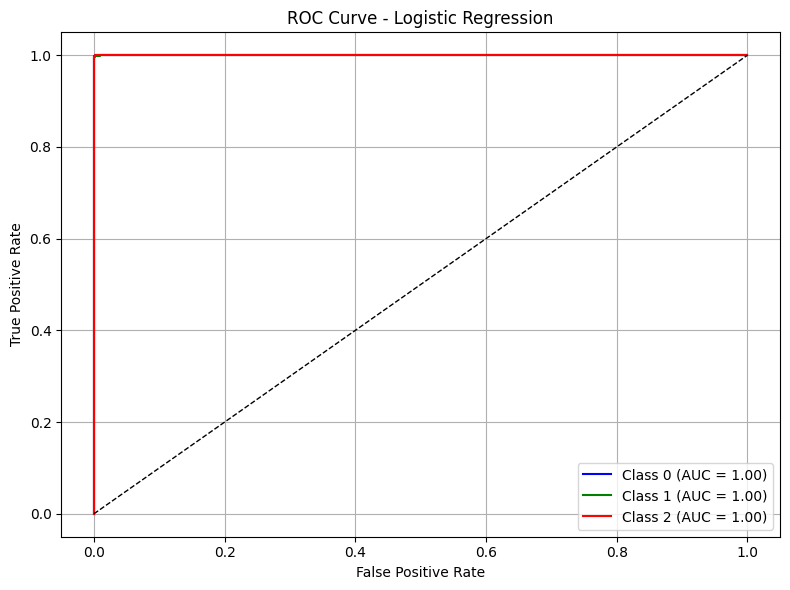

In [149]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarisasi label untuk multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]
y_prob_logreg = logreg.predict_proba(X_test_scaled)


# ROC untuk Logistic Regression
fpr_logreg = dict()
tpr_logreg = dict()
roc_auc_logreg = dict()

for i in range(n_classes):
    fpr_logreg[i], tpr_logreg[i], _ = roc_curve(y_test_bin[:, i], y_prob_logreg[:, i])
    roc_auc_logreg[i] = auc(fpr_logreg[i], tpr_logreg[i])

# Plot ROC
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'orange', 'purple']

for i in range(n_classes):
    plt.plot(fpr_logreg[i], tpr_logreg[i], color=colors[i % len(colors)],
             label=f'Class {i} (AUC = {roc_auc_logreg[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [150]:
from sklearn.metrics import roc_auc_score
# Prediksi probabilitas untuk semua kelas

roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg, multi_class='ovr', average='macro')
print(f"ROC AUC Logistic Regression: {roc_auc_logreg:.4f}")

ROC AUC Logistic Regression: 1.0000


Naive Bayes

In [151]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)


Mengevaluasi model

In [152]:
conf_matrix = confusion_matrix(y_test, y_pred_nb)
class_report = classification_report(y_test, y_pred_nb)
accuracy = accuracy_score(y_test,y_pred_nb)
precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
f1 = f1_score(y_test, y_pred_nb, average='weighted')

Menampilkan confusion matrix, classification report, accuracy, presicion score, recall score, dan f1 score

In [153]:
from sklearn.metrics import roc_auc_score



In [154]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\n")
print("Accuracy: ")
print(accuracy)
print("Precision Score: ")
print(precision)
print("recall_score: ")
print(recall)
print("F1 Score: ")
print(f1)


Confusion Matrix:
[[7228  337    0]
 [ 373 6811  494]
 [   0  492 6787]]

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.96      0.95      7565
           2       0.89      0.89      0.89      7678
           3       0.93      0.93      0.93      7279

    accuracy                           0.92     22522
   macro avg       0.92      0.92      0.92     22522
weighted avg       0.92      0.92      0.92     22522



Accuracy: 
0.9246958529437883
Precision Score: 
0.9245972385611182
recall_score: 
0.9246958529437883
F1 Score: 
0.9246428703177875


ROC

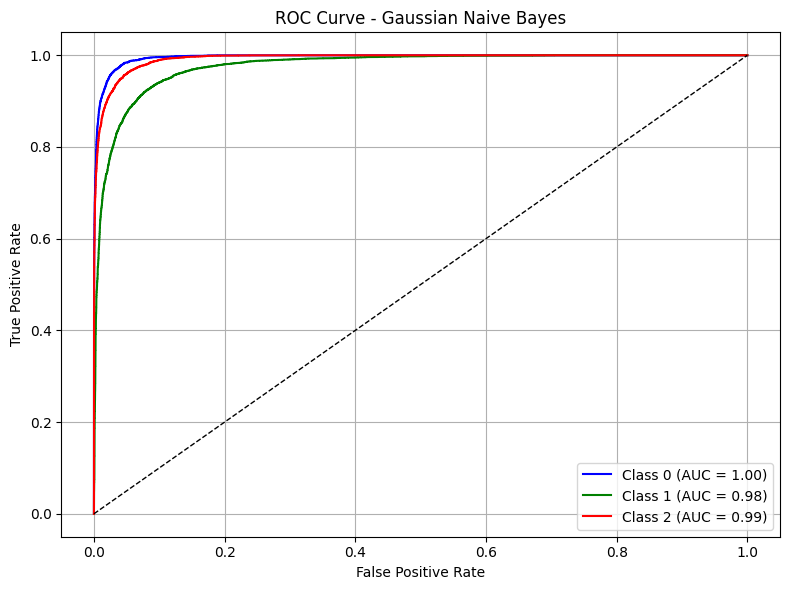

In [155]:
# ROC untuk Gaussian Naive Bayes
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()
y_prob_nb = nb.predict_proba(X_test_scaled)


for i in range(n_classes):
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test_bin[:, i], y_prob_nb[:, i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])

# Plot ROC
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'orange', 'purple']

for i in range(n_classes):
    plt.plot(fpr_nb[i], tpr_nb[i], color=colors[i % len(colors)],
             label=f'Class {i} (AUC = {roc_auc_nb[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [156]:

# Hitung ROC AUC (One-vs-Rest)

roc_auc_nb = roc_auc_score(y_test, y_prob_nb, multi_class='ovr', average='macro')


print(f"ROC AUC Gaussian Naive Bayes: {roc_auc_nb:.4f}")


ROC AUC Gaussian Naive Bayes: 0.9881


## Kmeans

Pilih kolom yang akan digunakan dalam pembuatan K-Means

In [157]:
numeric_features = [
    "Age", "Genetic_Risk", "Target_Severity_Score"
]
df_numeric = df[numeric_features]

Normalisasi data

In [158]:
scaler_kmeans = StandardScaler()
scaled_data = scaler_kmeans.fit_transform(df_numeric)
df_scaled = pd.DataFrame(scaled_data, columns=numeric_features)

Membuat elbow method untuk menentukan k optimal

In [159]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

Visualisasi plot elbow method

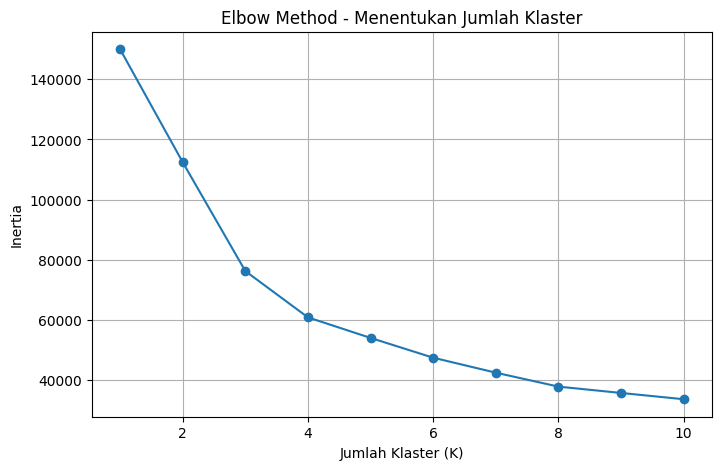

In [160]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method - Menentukan Jumlah Klaster")
plt.xlabel("Jumlah Klaster (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

Membentuk klaster dengan K-Means

In [161]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

Menambahkan kolom target

In [162]:
df_scaled['Target_Severity_Score'] = df_numeric['Target_Severity_Score']

Menghitung rata-rata Severity Score per klaster

In [163]:
cluster_summary = df_scaled.groupby("Cluster")["Target_Severity_Score"].mean().reset_index()
print("Rata-rata Target Severity Score per Klaster:")
print(cluster_summary)

Rata-rata Target Severity Score per Klaster:
   Cluster  Target_Severity_Score
0        0               4.181001
1        1               5.695679
2        2               5.714933
3        3               4.183735


Mereduksi dimensi data sehingga dapat divisualisasikan dalam bentuk 2D

In [164]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.drop(columns=["Target_Severity_Score", "Cluster"]))
df_scaled['PCA1'] = pca_result[:, 0]
df_scaled['PCA2'] = pca_result[:, 1]

Visualisasi klaster dengan PCA

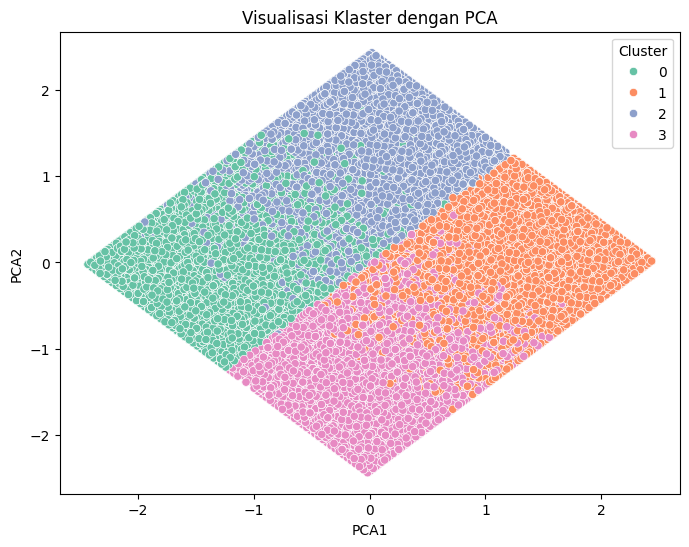

In [165]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df_scaled, palette="Set2")
plt.title("Visualisasi Klaster dengan PCA")
plt.show()

In [166]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def visualisasi_klaster(df):
    numeric_features = ["Age", "Genetic_Risk", "Target_Severity_Score"]
    df_numeric = df[numeric_features]

    # Standardisasi
    scaler_kmeans = StandardScaler()
    scaled_data = scaler_kmeans.fit_transform(df_numeric)
    df_scaled = pd.DataFrame(scaled_data, columns=numeric_features)

    # Clustering
    kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
    df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)
    df_scaled['Target_Severity_Score'] = df_numeric['Target_Severity_Score']

    # PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_scaled.drop(columns=["Target_Severity_Score", "Cluster"]))
    df_scaled['PCA1'] = pca_result[:, 0]
    df_scaled['PCA2'] = pca_result[:, 1]

    # Visualisasi dengan matplotlib
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df_scaled, palette="Set2", ax=ax)
    ax.set_title("Visualisasi Klaster dengan PCA")

    return fig


Menyimpan model

In [167]:
joblib.dump(logreg, 'model_kanker.pkl')
joblib.dump(scaler, 'scaler_kanker.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_test, 'y_test.pkl')
joblib.dump(nb, 'model_kanker_nb.pkl')       
joblib.dump(df_scaled, 'df_scaled.pkl')       
joblib.dump(y_prob_nb, 'y_prob_nb.pkl')       
joblib.dump(y_prob_logreg, 'y_prob_logreg.pkl')       
for col, le in label_encoders.items():
    joblib.dump(le, f'label_encoder_{col}.pkl')


In [168]:
!pip install pyngrok

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [169]:
!ngrok config add-authtoken 2xCPo0i5uyM6o8q9JY9kqZi3zH5_5htkjFt4PZRden23nLpgh

Authtoken saved to configuration file: C:\Users\Reza\AppData\Local/ngrok/ngrok.yml


In [170]:
!pip install streamlit
!pip install joblib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Streamlit

In [171]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# =====================================
# Load semua model & resource
# =====================================
logreg_model = joblib.load('model_kanker.pkl')
nb_model = joblib.load('model_kanker_nb.pkl')

scaler = joblib.load('scaler_kanker.pkl')
gender_encoder = joblib.load('label_encoder_Gender.pkl')
country_encoder = joblib.load('label_encoder_Country_Region.pkl')
cancer_type_encoder = joblib.load('label_encoder_Cancer_Type.pkl')
cancer_stage_encoder = joblib.load('label_encoder_Cancer_Stage.pkl')

X_test = joblib.load('X_test.pkl')
y_test = joblib.load('y_test.pkl')
y_prob_logreg = joblib.load('y_prob_logreg.pkl')
y_prob_nb = joblib.load('y_prob_nb.pkl')
df_scaled = joblib.load('df_scaled.pkl')

# =====================================
# Konfigurasi Halaman
# =====================================
st.set_page_config(page_title="Prediksi Keparahan Kanker", layout="centered")
st.title("🎗️ Prediksi Tingkat Keparahan Kanker")

st.markdown("Aplikasi ini memprediksi tingkat keparahan kanker menggunakan data pasien dan model machine learning.")
st.markdown("---")

# =====================================
# Pilih Model
# =====================================
model_choice = st.selectbox("Pilih Model yang Ingin Digunakan", ["Logistic Regression", "Naive Bayes"])
model = logreg_model if model_choice == "Logistic Regression" else nb_model

st.subheader(f"📊 Evaluasi Model ({model_choice})")

X_test_scaled = scaler.transform(X_test)
y_pred_test = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

col1, col2 = st.columns(2)
with col1:
    st.metric("Accuracy", f"{accuracy:.4f}")
    st.metric("Recall", f"{recall:.4f}")
with col2:
    st.metric("Precision", f"{precision:.4f}")
    st.metric("F1 Score", f"{f1:.4f}")

# Confusion Matrix
st.markdown("#### Confusion Matrix")
conf_matrix = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3], ax=ax)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
st.pyplot(fig)

# ROC Curve
st.markdown("#### ROC Curve")
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

selected_prob = y_prob_logreg if model_choice == "Logistic Regression" else y_prob_nb

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], selected_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig_roc, ax_roc = plt.subplots(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'orange', 'purple']

for i in range(n_classes):
    ax_roc.plot(fpr[i], tpr[i], color=colors[i % len(colors)],
                label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

ax_roc.plot([0, 1], [0, 1], 'k--', lw=1)
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title(f'ROC Curve - {model_choice}')
ax_roc.legend(loc='lower right')
ax_roc.grid(True)
st.pyplot(fig_roc)

st.markdown("---")

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df_scaled, palette="Set2", ax=ax)
ax.set_title("Visualisasi Klaster dengan PCA")
st.pyplot(fig)

# =====================================
# Form Input Data Pasien
# =====================================
st.subheader("🧾 Input Data Pasien")

age = st.slider("Umur", 0, 100, 30)
gender = st.selectbox("Jenis Kelamin", gender_encoder.classes_)
country = st.selectbox("Negara", country_encoder.classes_)
year = st.slider("Tahun Diagnosis", 2000, 2025, 2021)

genetic_risk = st.slider("Genetic Risk (0-10)", 0.0, 10.0, 5.0)
air_pollution = st.slider("Air Pollution (0-10)", 0.0, 10.0, 5.0)
alcohol_use = st.slider("Alcohol Use (0-10)", 0.0, 10.0, 5.0)
smoking = st.slider("Smoking (0-10)", 0.0, 10.0, 5.0)
obesity_level = st.slider("Obesity Level (0-10)", 0.0, 10.0, 5.0)

cancer_type = st.selectbox("Jenis Kanker", cancer_type_encoder.classes_)
cancer_stage = st.selectbox("Stadium Kanker", cancer_stage_encoder.classes_)

treatment_cost = st.number_input("Biaya Pengobatan (USD)", value=10000.0)
survival_years = st.slider("Perkiraan Tahun Bertahan Hidup", 0.0, 20.0, 5.0)

# =====================================
# Prediksi
# =====================================
if st.button("🔍 Prediksi Tingkat Keparahan"):
    input_df = pd.DataFrame([[
        age,
        gender_encoder.transform([gender])[0],
        country_encoder.transform([country])[0],
        year,
        genetic_risk,
        air_pollution,
        alcohol_use,
        smoking,
        obesity_level,
        cancer_type_encoder.transform([cancer_type])[0],
        cancer_stage_encoder.transform([cancer_stage])[0],
        treatment_cost,
        survival_years
    ]], columns=X_test.columns)

    input_scaled = scaler.transform(input_df)
    pred = model.predict(input_scaled)[0]

    severity_map = {1: "Ringan", 2: "Sedang", 3: "Berat"}
    st.success(f"🎯 **Tingkat Keparahan Kanker:** {severity_map.get(pred, 'Tidak Diketahui')}")


2025-06-01 18:23:01.129 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 18:23:01.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 18:23:01.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 18:23:01.132 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 18:23:01.132 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 18:23:01.132 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 18:23:01.134 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 18:23:01.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [172]:
from pyngrok import ngrok
import threading
import time
import os

In [173]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at:{public_url}")

Streamlit app is live at:NgrokTunnel: "https://a798-2001-448a-302e-10d4-657e-acb8-fa1b-e867.ngrok-free.app" -> "http://localhost:8501"
